# Лабораторная работа 5.2

Применение ансамблевых моделей (RandomForest, XGBoost) для классификации диабета

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier

In [10]:
df = pd.read_csv("diabetes.csv")
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## 1. RandomForest: влияние max_depth

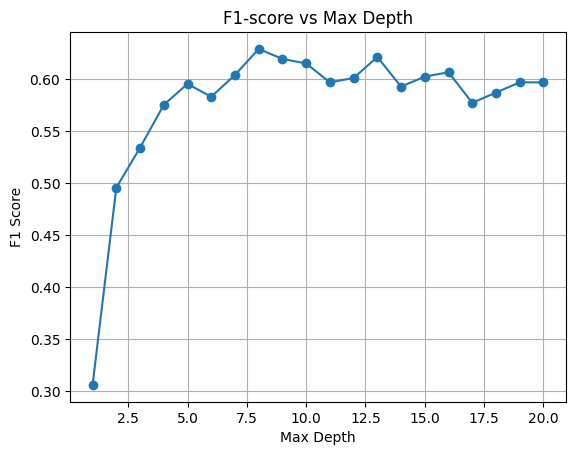

In [11]:
depths = range(1, 21)
scores = []
for d in depths:
    clf = RandomForestClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

plt.plot(depths, scores, marker='o')
plt.title("F1-score vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()

## 2. RandomForest: влияние max_features

In [ ]:
features_range = range(1, X.shape[1]+1)
scores_feat = []
for f in features_range:
    clf = RandomForestClassifier(max_features=f, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores_feat.append(f1_score(y_test, y_pred))

plt.plot(features_range, scores_feat, marker='o')
plt.title("F1-score vs Max Features")
plt.xlabel("Max Features")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()

## 3. RandomForest: влияние числа деревьев и времени обучения

In [ ]:
n_estimators_range = range(10, 201, 10)
scores_estimators = []
times = []
for n in n_estimators_range:
    start = time.time()
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    duration = time.time() - start
    times.append(duration)
    scores_estimators.append(f1_score(y_test, y_pred))

fig, ax1 = plt.subplots()
ax1.plot(n_estimators_range, scores_estimators, 'b-', label='F1 Score')
ax1.set_xlabel('Number of Estimators')
ax1.set_ylabel('F1 Score', color='b')

ax2 = ax1.twinx()
ax2.plot(n_estimators_range, times, 'r--', label='Training Time')
ax2.set_ylabel('Training Time (s)', color='r')

plt.title("Random Forest: Estimators vs F1 Score and Time")
plt.grid(True)
plt.show()

## 4. XGBoost: обучение и сравнение

In [8]:
xgb = XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, eval_metric='logloss')
start = time.time()
xgb.fit(X_train, y_train)
xgb_time = time.time() - start
y_pred_xgb = xgb.predict(X_test)
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f"XGBoost F1-score: {f1_xgb:.4f}, Training Time: {xgb_time:.2f} sec")

XGBoost F1-score: 0.6154, Training Time: 0.04 sec
